## 서울시 구별 CCTV / 인구 분석

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

In [22]:
import warnings
warnings.filterwarnings(action='ignore')

In [24]:
df = pd.read_csv('서울시_CCTV_인구_병합데이터.csv')
df.set_index('자치구', inplace=True)
df.head()

,Unnamed: 0,인구수,외국인인구수,고령자인구수,외국인비율,고령자비율,cctv대수,최근증가율
자치구,,,,,,,,
종로구,0,155106,9077,27605,5.852127,17.797506,1772,20.487805
중구,1,132259,9243,23980,6.988560,18.131091,2333,78.984238
용산구,2,240665,14287,38884,5.936468,16.156899,2383,78.635682
성동구,3,295767,6605,45591,2.233177,15.414499,3602,46.125155
광진구,4,355306,12825,50815,3.609565,14.301757,2588,112.292359


- 상관관계 분석

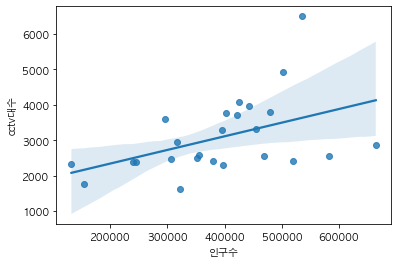

In [26]:
# CCTV 대수 vs 인구수, 외국인비율, 고령자비율
sns.regplot(x='인구수', y='cctv대수', data=df)
plt.show()

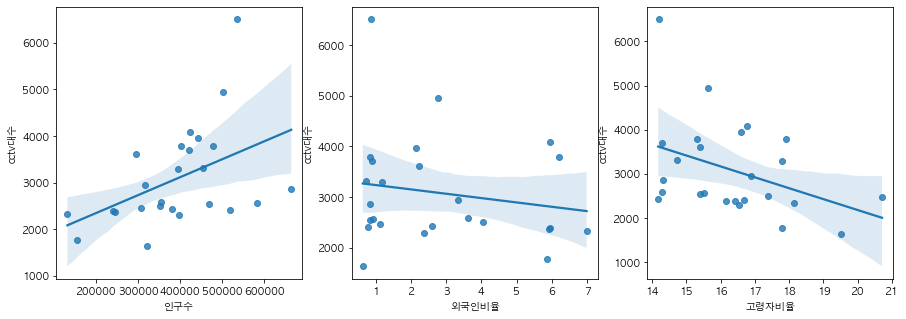

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
features = ['인구수', '외국인비율','고령자비율']
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='cctv대수', data=df, ax=axs[i])

# for i, feature in enumerate(feature):
#     print(i,feature)

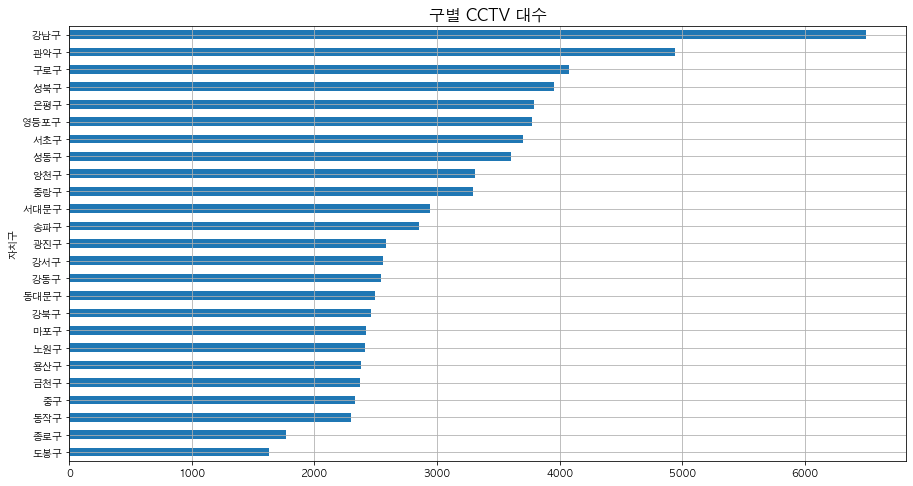

In [28]:
# 구별 cctv 대수
df['cctv대수'].sort_values().plot(kind='barh', grid=True, figsize=(15,8))
plt.title('구별 CCTV 대수', fontsize=16)
plt.show()

- 인구 천 명당 CCTV 대수

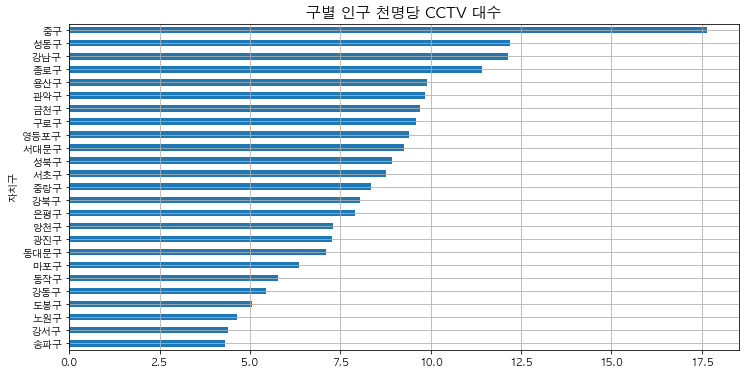

In [29]:
df['천명당CCTV'] = (df['cctv대수']/ df.인구수 * 1000).round(2)
df.천명당CCTV.sort_values().plot(kind='barh', grid = True, figsize=(12,6))
plt.title('구별 인구 천명당 CCTV 대수', fontsize=15)
plt.show()

# 드래그 하고 Ctrl + D 누르면 같은 글자 같이 고쳐짐

- 인구수와 cctv 대수 분석: 산점도

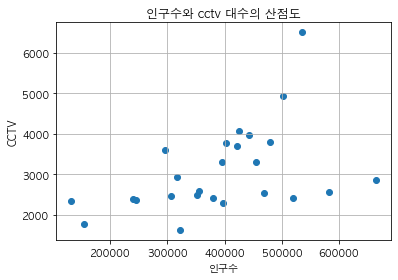

In [30]:
# 산점도(Scatter plot)
plt.scatter(x=df.인구수, y=df['cctv대수'])
plt.grid()
plt.title('인구수와 cctv 대수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

- 인구수와 cctv 대수 분석: 회귀선

In [31]:
weight, bias = np.polyfit(df.인구수, df['cctv대수'], 1)
weight, bias

(0.003851197650886375, 1572.3151359747476)

In [35]:
xs = np.array([100000, 700000])
ys = (weight * xs) + bias
ys
# ⭐️⭐️⭐️⭐️⭐️⭐️ 오류남

array([1957.43490106, 4268.1534916 ])

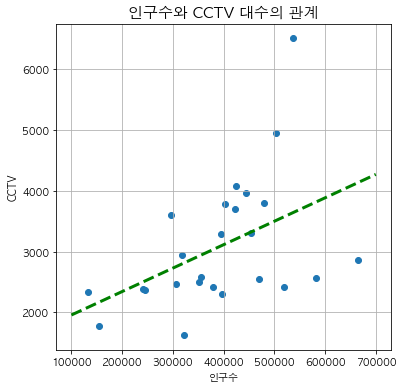

In [36]:
plt.figure(figsize=(6,6))
plt.scatter(x=df.인구수, y=df['cctv대수'])
plt.plot(xs, ys, 'g--', lw=3)
plt.grid()
plt.title('인구수와 CCTV 대수의 관계', fontsize=15)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

- 회귀선과 산점도 사이의 오차

In [39]:
df['오차'] = abs(df['cctv대수'] - (df.인구수*weight + bias)).round(2)
df_sort = df.sort_values(by='오차',ascending=False)
df_sort.head(3)

,Unnamed: 0,인구수,외국인인구수,고령자인구수,외국인비율,고령자비율,cctv대수,최근증가율,천명당CCTV,오차
자치구,,,,,,,,,,
강남구,22,536107,4732,76184,0.882660,14.210596,6502,61.636002,12.13,2865.03
관악구,20,502698,13898,78647,2.764682,15.644980,4942,49.908369,9.83,1433.70
송파구,23,664341,5671,95164,0.853628,14.324571,2854,203.193833,4.30,1276.82


- 최종 그림

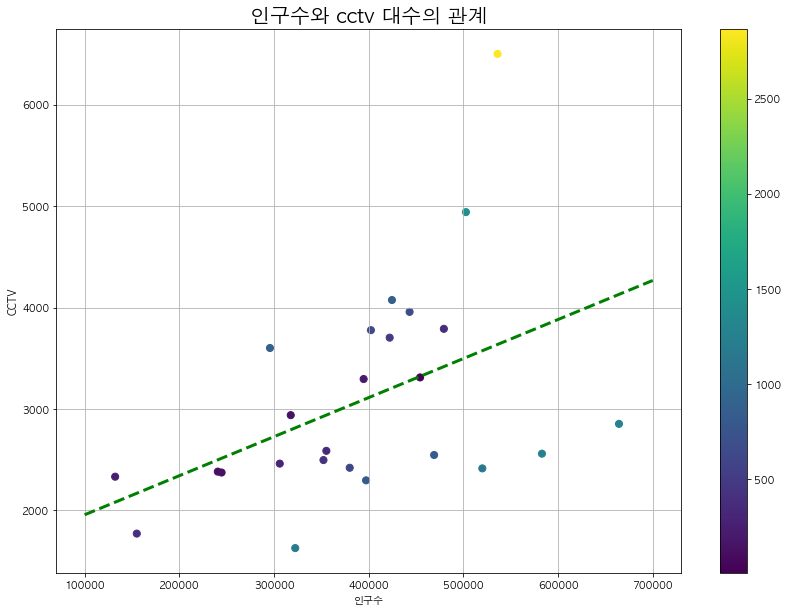

In [41]:
plt.figure(figsize=(14,10))
plt.scatter(x=df.인구수, y=df['cctv대수'], c= df.오차, s=50)
plt.plot(xs, ys, 'g--', lw=3)
#    for i in range(10):
#        plt.text(df_sort.인구수[i]+9000, df_sort['cctv 대수'][i]-50, df_sort.index[i], fontsize=15)
plt.grid()
plt.title('인구수와 cctv 대수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.show()

- 최종 그림 : text 포함

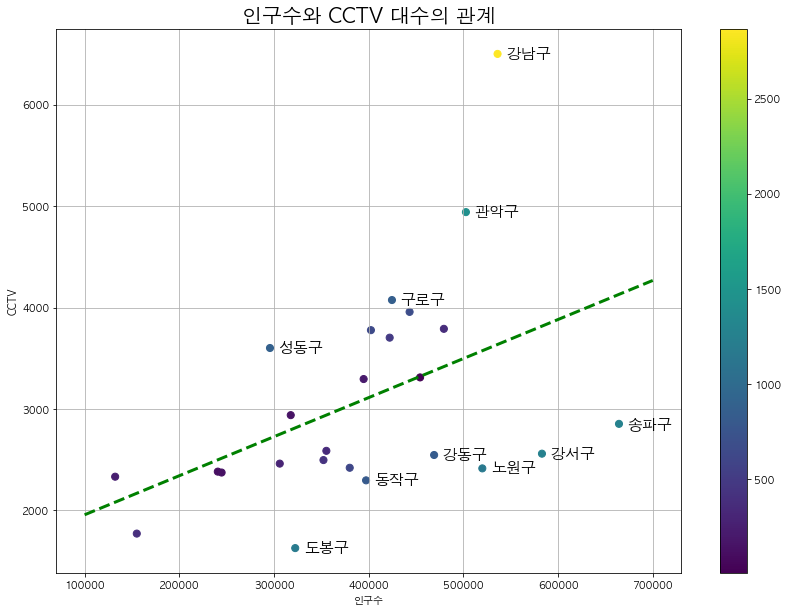

In [43]:
plt.figure(figsize=(14,10))
plt.scatter(x=df.인구수, y=df['cctv대수'], c=df.오차, s=50)
plt.plot(xs, ys, 'g--', lw=3)
for i in range(10):
    plt.text(df_sort.인구수[i]+9000, df_sort['cctv대수'][i]-50,
             df_sort.index[i], fontsize=15)
plt.grid()
plt.title('인구수와 CCTV 대수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.savefig('서울시_인구수와_CCTV대수의_관계.png')